# NLP Marketing Company

### Scenario: 
A marketing company ( filed of marketing and advertising) whant to know  what news topics people are interested in and prefer, which helps the company to improve attracts people and attract the largest number of people


### What we gonna use: 
  <ol>
    
  <li>Topic Modeling: To find the topic of the text and create new column topic </li>
    
  <li>Clustering: To classify similar topic and  find the behavior data</li>
    
  <li>Classification: Use the new column from topic modeling to know what is the most topic has click</li>
  </ol>


###  Content: 
<a href=#imports>Import Libraries</a>

<a href=#fn>Helper Function</a>

<a href=#load>Load Data</a>

<a href=#EDA>Data Exploration</a>

<a href=#db>Data Prepocessing</a>

<a href=#dv>Data Visualization</a>

<a href=#tp>Topic Modeling</a>







# <a name=imports>Import libraries</a>

In [1]:
import nltk
import pandas as pd
import numpy as np
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob, Word
from nltk.stem import PorterStemmer

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn import datasets

from sklearn.model_selection import  RandomizedSearchCV,GridSearchCV

# <a name=fn>Helper Function</a>

In [2]:

def preprocess(text):
    text = text.lower() #lowercase text
    text = text.strip()  #get rid of leading/trailing whitespace 
 #   text = re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)


#snow = SnowballStemmer('english')
#def stemming(string):
 #   a=[snow.stem(i) for i in word_tokenize(string) ]
  #  return " ".join(a)


 
lemmatizer = WordNetLemmatizer()
def lemmatiz(string):
    a=[lemmatizer.lemmatize(i) for i in word_tokenize(string) ]
    return " ".join(a)

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# <a name=load>Load Data</a>

In [3]:
df = pd.read_csv('clickbait_data.csv')
df

headline  clickbait
0                                     Should I Get Bings          1
1          Which TV Female Friend Group Do You Belong In          1
2      The New "Star Wars: The Force Awakens" Trailer...          1
3      This Vine Of New York On "Celebrity Big Brothe...          1
4      A Couple Did A Stunning Photo Shoot With Their...          1
...                                                  ...        ...
31995  To Make Female Hearts Flutter in Iraq, Throw a...          0
31996  British Liberal Democrat Patsy Calton, 56, die...          0
31997  Drone smartphone app to help heart attack vict...          0
31998  Netanyahu Urges Pope Benedict, in Israel, to D...          0
31999  Computer Makers Prepare to Stake Bigger Claim ...          0

[32000 rows x 2 columns]

# <a name=EDA>Data Exploration</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB


In [5]:
df.isna().sum()

headline     0
clickbait    0
dtype: int64

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

headline - 0%
clickbait - 0%


In [7]:
df.clickbait.value_counts()

0    16001
1    15999
Name: clickbait, dtype: int64

In [8]:
df.headline.value_counts()

Former chief of Czechoslovak constitutional court murdered                                                          1
British Boxers Fight for the Spotlight                                                                              1
22 Things You'll Just Get If You Love Animals More Than People                                                      1
12 Wedding Tips For Brides With Anxiety                                                                             1
Report: Man tries to hang himself on an American Airlines flight                                                    1
                                                                                                                   ..
17 Charts To Help You Eat Healthy                                                                                   1
Delaying College for a Year Could Have Benefits                                                                     1
20-year-old captures abusive police officer on tape     

In [9]:
# تم سرقة افكار من موقع 
#https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

<AxesSubplot:>

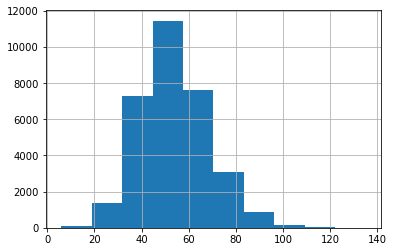

In [10]:
#First, I’ll take a look at the number of characters present in each sentence. 
#This can give us a rough idea about the news headline length.
df['headline'].str.len().hist()

<AxesSubplot:>

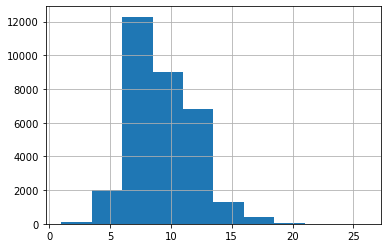

In [11]:
#Now, we will move on to data exploration at a word-level.
#Let’s plot the number of words appearing in each news headline.
df.headline.str.split().\
    map(lambda x: len(x)).\
    hist()

# <a name=db>Data Prepocessing</a>

In [12]:
df.headline=df.headline.apply(preprocess)
df.headline=df.headline.apply(stopword)
#df.headline=df.headline.apply(stemming)
df.headline=df.headline.apply(lemmatiz)
df.headline

0                                                get bings
1                            tv female friend group belong
2            new star war force awakens trailer give chill
3        vine new york celebrity big brother fucking pe...
4        couple stunning photo shoot baby learning inop...
                               ...                        
31995            make female heart flutter iraq throw shoe
31996      british liberal democrat patsy calton dy cancer
31997    drone smartphone app help heart attack victim ...
31998    netanyahu urge pope benedict israel denounce iran
31999      computer maker prepare stake bigger claim phone
Name: headline, Length: 32000, dtype: object

In [13]:
#Vectorize the text data using the TfidfVectorizer <<< ليش نستخدمها وايش الهدف منها 
vectorizer = TfidfVectorizer(stop_words = 'english')
doc_word = vectorizer.fit_transform(df.headline)
pd.DataFrame(doc_word.toarray(), index=df.headline, columns=vectorizer.get_feature_names()).head(10)

aa  aaa  aaevpc  aap  \
headline                                                                    
get bings                                           0.0  0.0     0.0  0.0   
tv female friend group belong                       0.0  0.0     0.0  0.0   
new star war force awakens trailer give chill       0.0  0.0     0.0  0.0   
vine new york celebrity big brother fucking per...  0.0  0.0     0.0  0.0   
couple stunning photo shoot baby learning inope...  0.0  0.0     0.0  0.0   
flirt queer girl without making total fool          0.0  0.0     0.0  0.0   
cute thing distract awkward thanksgiving            0.0  0.0     0.0  0.0   
disney princess florida                             0.0  0.0     0.0  0.0   
whats quote lyric best describes depression         0.0  0.0     0.0  0.0   
natalie dormer sam claflin play game see theyd ...  0.0  0.0     0.0  0.0   

                                                    aaron   ab  abandon  \
headline                                                                  
get bings                                             0.0  0.0      0.0   
tv female friend group belong                         0.0  0.0      0.0   
new star war force awakens trailer give chill         0.0  0.0      0.0   
vine new york celebrity big brother fucking per...    0.0  0.0      0.0   
couple stunning photo shoot baby learning inope...    0.0  0.0      0.0   
flirt queer girl without making total fool            0.0  0.0      0.0   
cute thing distract awkward thanksgiving              0.0  0.0      0.0   
disney princess florida                               0.0  0.0      0.0   
whats quote lyric best describes depression           0.0  0.0      0.0   
natalie dormer sam claflin play game see theyd ...    0.0  0.0      0.0   

                                                    abandoned  abandoning  \
headline                                                                    
get bings                                                 0.0         0.0   
tv female friend group belong                             0.0         0.0   
new star war force awakens trailer give chill             0.0         0.0   
vine new york celebrity big brother fucking per...        0.0         0.0   
couple stunning photo shoot baby learning inope...        0.0         0.0   
flirt queer girl without making total fool                0.0         0.0   
cute thing distract awkward thanksgiving                  0.0         0.0   
disney princess florida                                   0.0         0.0   
whats quote lyric best describes depression               0.0         0.0   
natalie dormer sam claflin play game see theyd ...        0.0         0.0   

                                                    abba  ...  zykina  złoty  \
headline                                                  ...                  
get bings                                            0.0  ...     0.0    0.0   
tv female friend group belong                        0.0  ...     0.0    0.0   
new star war force awakens trailer give chill        0.0  ...     0.0    0.0   
vine new york celebrity big brother fucking per...   0.0  ...     0.0    0.0   
couple stunning photo shoot baby learning inope...   0.0  ...     0.0    0.0   
flirt queer girl without making total fool           0.0  ...     0.0    0.0   
cute thing distract awkward thanksgiving             0.0  ...     0.0    0.0   
disney princess florida                              0.0  ...     0.0    0.0   
whats quote lyric best describes depression          0.0  ...     0.0    0.0   
natalie dormer sam claflin play game see theyd ...   0.0  ...     0.0    0.0   

                                                     ºf  ángel  íngrid  \
headline                                                                 
get bings                                           0.0    0.0     0.0   
tv female friend group belong                       0.0    0.0     0.0   
new star war force awakens trailer give chill

# <a name=dv>Data Visualization</a>

#### for all data 


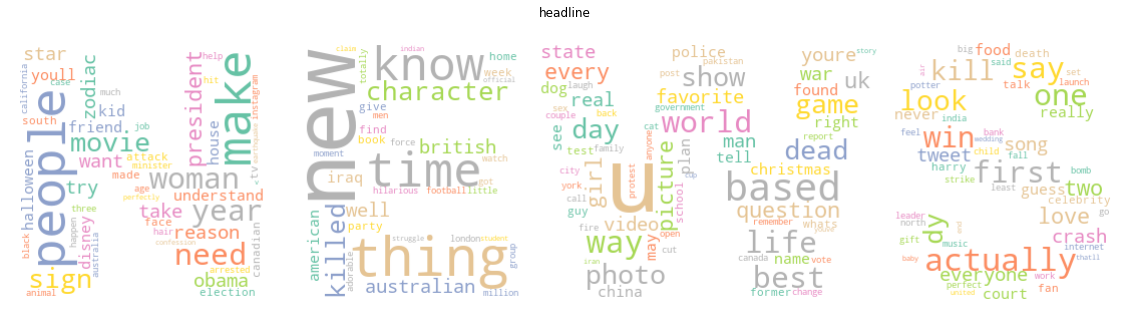

In [14]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator 
from textblob import TextBlob, Word
# Join the different processed titles together.
long_string = ','.join(list(df['headline'].values))
mask = np.array(Image.open("News_mask.PNG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=mask).generate(long_string) 
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news for all hedline.png", format="png") 
plt.title("headline");

plt.show()

####  for click and non-click


In [15]:
non_clickbait = df.loc[df['clickbait']==0]
clickbait  = df.loc[df['clickbait']==1]

In [16]:
non_clickbait = non_clickbait['headline'].str.cat(sep=' ')
clickbait = clickbait['headline'].str.cat(sep=' ')

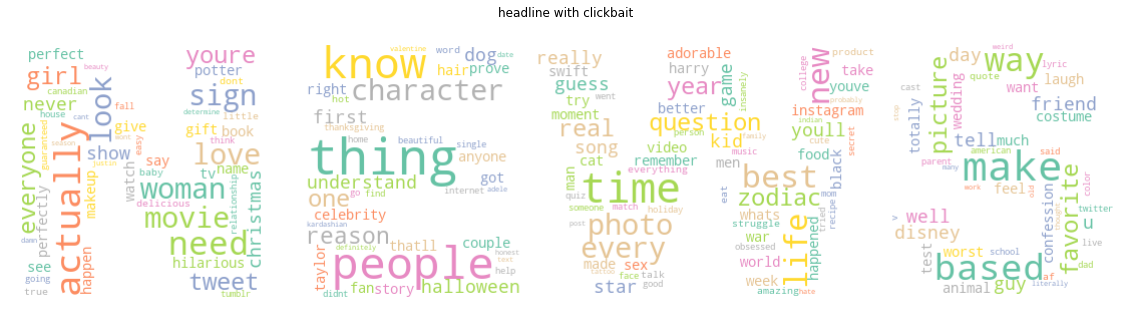

In [17]:

# Generate a word cloud image
mask = np.array(Image.open("News_mask.PNG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=mask).generate(clickbait) 
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("headline with clickbait.png", format="png") 
plt.title("headline with clickbait");

plt.show()

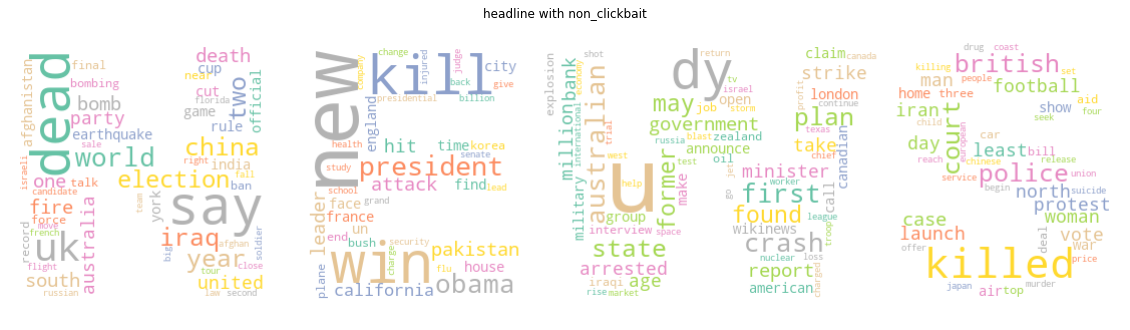

In [18]:
from PIL import Image

# Generate a word cloud image
from wordcloud import WordCloud, ImageColorGenerator

mask = np.array(Image.open("News_mask.PNG"))
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=mask).generate(non_clickbait) 
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("headline with non_clickbait.png", format="png") 
plt.title("headline with non_clickbait");

plt.show()

# <a name=tp>Topic Modeling</a>

### LDA model

In [31]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4,)
lda_output = lda_model.fit_transform(doc_word )

print(lda_model)  # Model attributes

LatentDirichletAllocation(n_components=4)


In [34]:
lda_output = lda_model.transform(doc_word)

# column names
topicnames = ['Lifestyle','Entertainment','Politics','Crimes']

# index names
docnames = ["headline " + str(i) for i in range(len(df.headline))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

### Results of LDA model

In [35]:
display_topics(lda_model, vectorizer.get_feature_names(), 15,topic_names=topicnames)


Topic: ' Lifestyle '
thing, time, make, people, best, actually, tweet, know, understand, way, love, picture, photo, like, life

Topic: ' Entertainment '
based, know, character, question, sign, zodiac, favorite, star, disney, movie, remember, guess, new, actually, way

Topic: ' Politics '
new, obama, president, state, bank, china, plan, court, say, election, uk, government, launch, australian, deal

Topic: ' Crimes '
kill, killed, dead, crash, pakistan, attack, new, bomb, iraq, police, hit, talk, earthquake, bombing, strike


In [38]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, doc_word, vectorizer, mds='tsne')
panel
#pyLDAvis.save_html(panel, 'lda.html')


C:\Users\Hrlt2\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      269.562408 -124.803398       1        1  27.703089
2        1.782994 -295.079681       2        1  25.829502
3      220.811432 -343.832123       3        1  23.422430
1       50.533993  -76.050934       4        1  23.044979, topic_info=            Term        Freq       Total Category  logprob  loglift
1507       based  151.000000  151.000000  Default  30.0000  30.0000
10014       kill  101.000000  101.000000  Default  29.0000  29.0000
14679   question   96.000000   96.000000  Default  28.0000  28.0000
3069   character  103.000000  103.000000  Default  27.0000  27.0000
10102       know  209.000000  209.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
20305      woman   39.061021  114.363481   Topic4  -6.0644   0.3935
18476      thing   41.759287  263.921805   Topic4  -5.9976  -0.3760
13547     people   39.266369  217.704366   Topic4  -6.0592  -0.2450
20474       year   34.834355  121.800232   Topic4  -6.1789   0.2159
20531      youre   34.663348   83.218252   Topic4  -6.1839   0.5919

[267 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
100        3  0.988996  accident
162        1  0.639083  actually
162        2  0.006455  actually
162        3  0.032277  actually
162        4  0.316314  actually
...      ...       ...       ...
20524      1  0.860133     youll
20524      4  0.131207     youll
20531      1  0.576797     youre
20531      4  0.420581     youre
20619      4  0.992244    zodiac

[439 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])